In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

sales = pd.read_csv('Album_sales_2.txt',sep='\t')
sales

,adverts,sales,airplay,attract
0,10.256,330,43,10
1,985.685,120,28,7
2,1445.563,360,35,7
3,1188.193,270,33,7
4,574.513,220,44,5
...,...,...,...,...
195,910.851,190,26,7
196,888.569,240,14,6
197,800.615,250,34,6
198,1500.000,230,11,8


- advers : 광고비
- sales: 판매량
- airplay : 음반 출시전 한 주 동안 노래들이 라디오1에 방송된 횟수
- attract : 밴드 매력(0~10)

### 1-1) 히스토그램 등 EDA

In [35]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   adverts  200 non-null    float64
 1   sales    200 non-null    int64  
 2   airplay  200 non-null    int64  
 3   attract  200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [157]:
sales.describe()

,adverts,sales,airplay,attract
count,200.000000,200.000000,200.000000,200.00000
mean,614.412255,193.200000,27.500000,6.77000
std,485.655208,80.698957,12.269585,1.39529
min,9.104000,10.000000,0.000000,1.00000
25%,215.917750,137.500000,19.750000,6.00000
50%,531.916000,200.000000,28.000000,7.00000
75%,911.225500,250.000000,36.000000,8.00000
max,2271.860000,360.000000,63.000000,10.00000


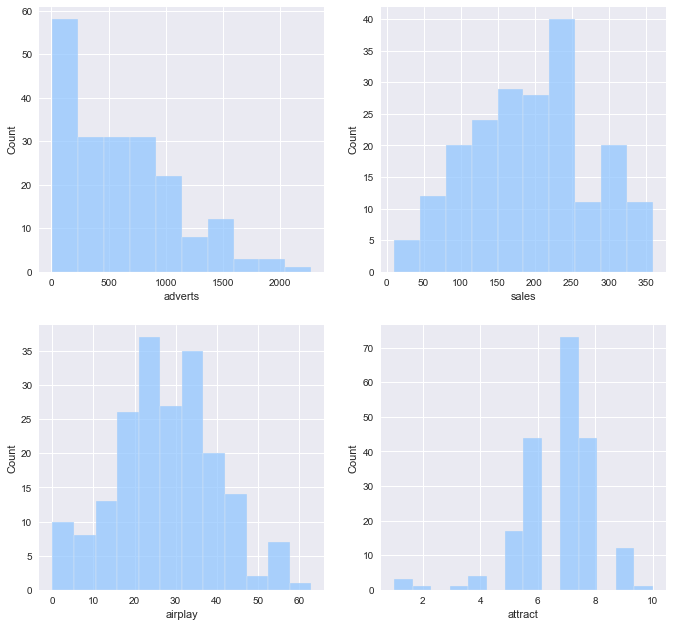

In [31]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,10))
for i,j in enumerate(sales.columns):
    plt.subplot(2,2,i+1)
    sns.histplot(sales[j])

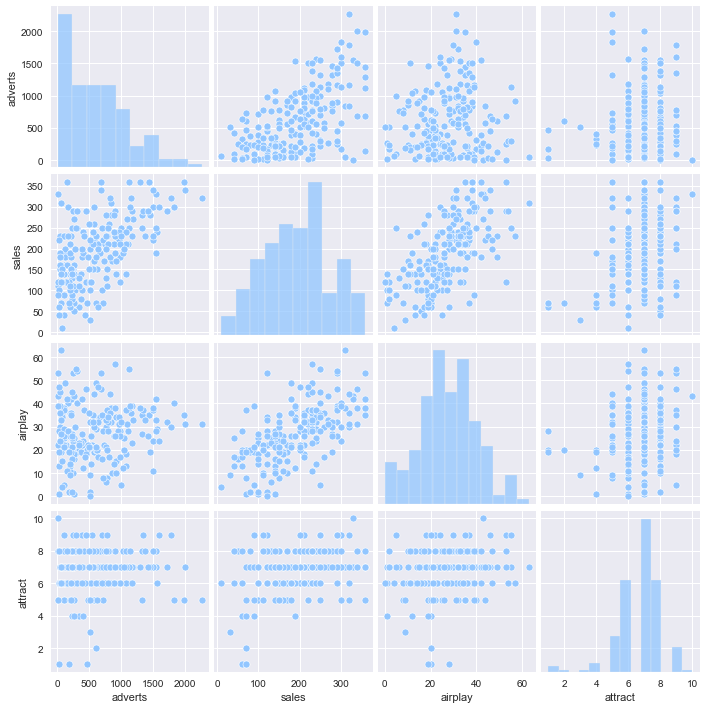

In [34]:
sns.pairplot(sales)

<AxesSubplot:>

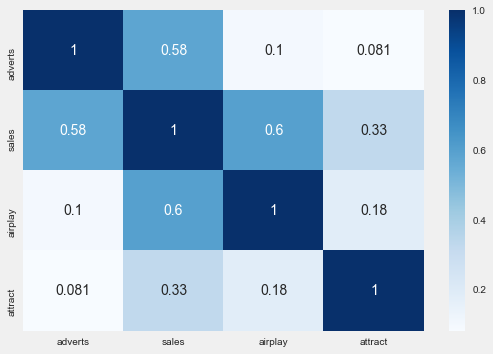

In [160]:
sns.heatmap(sales.corr(),annot=True,cmap='Blues')

### 1-2) train, test로 분리 후 다중회귀분석 결과 해석

In [44]:
x_train, x_test, y_train, y_test = train_test_split(sales.iloc[:,[0,2,3]], sales['sales'],)

In [46]:
x_data = sm.add_constant(x_train, has_constant = "add")

In [51]:
# const넣음
model = sm.OLS(y_train,x_data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     90.71
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           3.44e-33
Time:                        14:24:41   Log-Likelihood:                -789.91
No. Observations:                 150   AIC:                             1588.
Df Residuals:                     146   BIC:                             1600.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.6149     21.619     -1.694      0.092     -79.341       6.111
adverts        0.0825      0.008     10.032      0.000       0.066       0.099
airplay        3.4240      0.314     10.897      0.000       2.803       4.045
attract       12.5468      2.997      4.187      0.000       6.624      18.470
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.189
Skew:                           0.086   Prob(JB):                        0.910
Kurtosis:                       2.972   Cond. No.                     4.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
y_pred = result.predict(ols.add_constant(x_test, has_constant = "add"))
mean_squared_error(y_pred,y_test)

2128.1345418881824

In [50]:
# 안넣음
model2 = sm.OLS(y_train,x_train)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              928.3
Date:                Fri, 09 Oct 2020   Prob (F-statistic):                    2.75e-95
Time:                        14:24:05   Log-Likelihood:                         -791.37
No. Observations:                 150   AIC:                                      1589.
Df Residuals:                     147   BIC:                                      1598.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
adverts        0.0797      0.008      9.830      0.000       0.064       0.096
airplay        3.3006      0.308     10.731      0.000       2.693       3.908
attract        8.1136      1.468      5.525      0.000       5.212      11.016
==============================================================================
Omnibus:                        0.694   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.587
Skew:                           0.153   Prob(JB):                        0.745
Kurtosis:                       2.990   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
y_pred = result2.predict(x_test)
mean_squared_error(y_pred,y_test)

2093.0726936877363

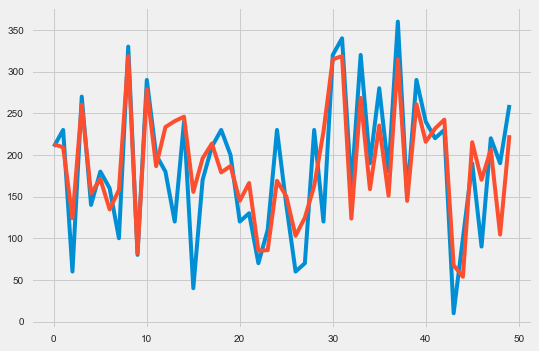

In [170]:
plt.plot(y_test.values)
plt.plot(y_pred.values)

In [80]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
[variance_inflation_factor(x_train.values,i) for i in range(3)]

[2.6632477766856404, 5.761240629832455, 6.855611086457372]

변수가 적어 모든 경우를 다 해보기

In [190]:
from itertools import combinations
joint = []
for i in range(1,4):
    k = combinations(x_train.columns,i)
    for j in k:
        joint.append(j)

[('adverts',),
 ('airplay',),
 ('attract',),
 ('adverts', 'airplay'),
 ('adverts', 'attract'),
 ('airplay', 'attract'),
 ('adverts', 'airplay', 'attract')]

In [198]:
stepw = []
for i in joint:
    model = sm.OLS(y_train,x_train[list(i)])
    result = model.fit()
    y_pred = result.predict(x_test[list(i)])
    stepw.append([list(i),result.aic,mean_squared_error(y_pred,y_test)])

In [202]:
stepw_frame = pd.DataFrame(stepw, columns=['Variables','AIC','MSE'])
stepw_frame.set_index('Variables',inplace=True)
stepw_frame

,AIC,MSE
Variables,,
[adverts],1832.620857,9775.286334
[airplay],1716.242475,5246.164309
[attract],1727.874967,6423.816111
"[adverts, airplay]",1615.042139,2447.023190
"[adverts, attract]",1673.510244,3376.763066
"[airplay, attract]",1662.523096,4237.857648
"[adverts, airplay, attract]",1588.737818,2093.072694


3개 다 선택하는 것이 좋다

<br>

### 1-3)다중회귀분석의 매개변수별 신뢰구간

In [88]:
result2.conf_int()

,0,1
adverts,0.063717,0.095782
airplay,2.692710,3.908404
attract,5.211536,11.015580


### 1-4) 독립성, 정규성 가정 평가

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

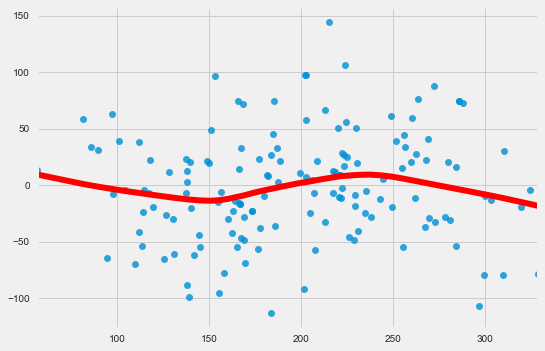

In [89]:
# 독립성
sns.regplot(result2.fittedvalues, result2.resid, lowess=True, line_kws={'color': 'red'})

summary에서 durbin-watson 값이 1.5~2.5 안에 있어야 정상이라고 함

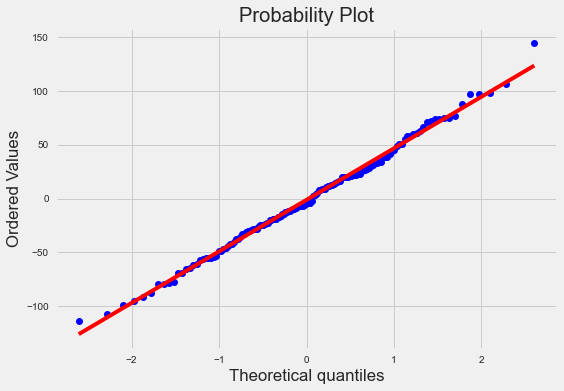

In [97]:
#정규성
stats.probplot(result2.resid,plot=plt);

In [182]:
stats.shapiro(result2.resid)

(0.9950959086418152, 0.8982971906661987)

### 1-5) 표준화잔차, cook's distance, DFBeta, 공분산비를 원 데이터 각 사례에 추가 후 album_sales_diagnostics.dat으로 저장

In [107]:
infl = result2.get_influence()
sm_fr = infl.summary_frame()
sm_fr

,dfb_adverts,dfb_airplay,dfb_attract,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
23,-0.000441,-0.009346,0.000516,0.000159,-0.238252,0.008315,-0.021816,-0.237486,-0.021746
33,-0.005728,0.022027,-0.020366,0.000221,-0.152693,0.027656,-0.025751,-0.152185,-0.025666
117,-0.004076,0.000292,-0.001237,0.000026,-0.133886,0.004372,-0.008872,-0.133438,-0.008842
93,-0.054948,-0.212492,0.243871,0.020558,1.247608,0.038112,0.248342,1.249992,0.248816
64,-0.029928,-0.040401,0.068245,0.001846,0.489364,0.022606,0.074423,0.488095,0.074230
...,...,...,...,...,...,...,...,...,...
153,-0.050052,0.055071,-0.006892,0.002166,0.452345,0.030779,0.080610,0.451118,0.080391
130,0.002361,0.053852,-0.030313,0.001554,0.697670,0.009485,0.068270,0.696447,0.068151
104,-0.048983,0.167837,-0.092858,0.010958,0.829723,0.045577,0.181316,0.828839,0.181123
161,0.094157,0.025861,-0.098308,0.005490,-1.127330,0.012794,-0.128339,-1.128377,-0.128458


In [112]:
album_sales_diagnostics = pd.concat([x_train,y_train],axis=1)
album_sales_diagnostics

,adverts,airplay,attract,sales
23,656.137,34,7,210
33,759.862,6,7,130
117,624.538,20,5,150
93,268.598,1,7,140
64,391.749,22,9,200
...,...,...,...,...
153,42.568,45,7,230
130,509.430,32,5,220
104,305.268,54,6,290
161,26.895,19,6,60


In [175]:
album_sales_diagnostics['cook'] = infl.cooks_distance[0]
album_sales_diagnostics['resid_std'] = infl.resid_studentized
album_sales_diagnostics[['dfbeta_adverts','dfbeta_airplay','dfbeta_attract']] = infl.dfbeta
album_sales_diagnostics['covariance'] = infl.cov_ratio
album_sales_diagnostics.head()

,adverts,airplay,attract,sales,cook,resid_std,dfbeta_adverts,dfbeta_airplay,dfbeta_attract,covariance
23,656.137,34,7,210,0.000159,-0.238252,-0.000004,-0.002884,0.000760,1.028055
33,759.862,6,7,130,0.000221,-0.152693,-0.000047,0.006798,-0.030006,1.049221
117,624.538,20,5,150,0.000026,-0.133886,-0.000033,0.000090,-0.001823,1.024796
93,268.598,1,7,140,0.020558,1.247608,-0.000445,-0.065233,0.357433,1.027779
64,391.749,22,9,200,0.001846,0.489364,-0.000243,-0.012459,0.100476,1.039201


In [176]:
album_sales_diagnostics.to_csv('a.dat')

### 1-6) album_sales_diagnostics.dat을 불러와 영향력이 큰 사례를 찾고 설명

In [177]:
album = pd.read_csv('a.dat',index_col='Unnamed: 0')
album.head()

,adverts,airplay,attract,sales,cook,resid_std,dfbeta_adverts,dfbeta_airplay,dfbeta_attract,covariance
23,656.137,34,7,210,0.000159,-0.238252,-0.000004,-0.002884,0.000760,1.028055
33,759.862,6,7,130,0.000221,-0.152693,-0.000047,0.006798,-0.030006,1.049221
117,624.538,20,5,150,0.000026,-0.133886,-0.000033,0.000090,-0.001823,1.024796
93,268.598,1,7,140,0.020558,1.247608,-0.000445,-0.065233,0.357433,1.027779
64,391.749,22,9,200,0.001846,0.489364,-0.000243,-0.012459,0.100476,1.039201


In [211]:
album.resid_std = np.abs(album.resid_std)
album.sort_values(by = ['cook','resid_std'],ascending=[False, False])

,adverts,airplay,attract,sales,cook,resid_std,dfbeta_adverts,dfbeta_airplay,dfbeta_attract,covariance
168,145.585,42,8,360,0.075704,3.067079,-0.002579,0.071664,0.107867,0.857218
0,10.256,43,10,330,0.065682,2.262619,-0.002828,0.025215,0.302940,0.953043
118,912.349,57,6,230,0.053361,1.709781,-0.000618,-0.111819,0.430083,1.013622
99,1000.000,5,7,250,0.050402,2.064131,0.001338,-0.098943,0.371103,0.967650
54,1542.329,33,8,190,0.050391,2.267631,-0.002619,0.004308,0.094568,0.944246
...,...,...,...,...,...,...,...,...,...,...
79,15.313,22,5,110,0.000026,0.092506,0.000056,-0.000595,-0.005664,1.029915
117,624.538,20,5,150,0.000026,0.133886,-0.000033,0.000090,-0.001823,1.024796
179,26.598,47,8,220,0.000025,0.045893,0.000048,-0.001569,-0.000459,1.056691
141,893.355,26,6,210,0.000023,0.089516,0.000044,0.000217,-0.001188,1.029495


- cook 높고 resid 높은 게 영향력 큰 거라고 생각....

<br>

### 1-7) 일반화가법모델링 후 예측결과를 다중회귀와 비교

In [180]:
from statsmodels.gam.api import GLMGam , BSplines
bs = BSplines(x_train['adverts'], df=[5], degree=[3])
gam_bs =GLMGam.from_formula('sales ~ airplay + attract'
                           ,data = pd.concat([x_train,y_train],axis=1)
                            ,smooth=bs)

AttributeError: 'NoneType' object has no attribute 'k_variables'

In [144]:
import inspect
print(inspect.getsource(GLMGam))

class GLMGam(PenalizedMixin, GLM):
    """Model class for generalized additive models, GAM.

    This inherits from `GLM`.

    penalization. Not all options including offset and exposure have been
    verified yet.

    Parameters
    ----------
    endog : array_like
    exog : array_like or None
        This explanatory variables are treated as linear. The model in this
        case is a partial linear model.
    smoother : instance of additive smoother class such as Bsplines or
        CyclicCubicSplines
        This is a required keyword argument
    alpha : list of floats
        penalization weights for smooth terms. The length of the list needs
        to be the same as the number of smooth terms in the ``smoother``
    family : instance of GLM family
        see GLM
    offset : None or array_like
        see GLM
    exposure : None or array_like
        see GLM
    missing : 'none'
        missing value handling is not supported in this class
    kwargs :
        extra keywor

In [166]:
bs.k_variables

3